#  Task 1 – Data Preparation
We will:
1. Load the IMDB dataset from Keras (limited to top 10,000 words).
2. Pad/truncate sequences so every review is exactly 200 tokens.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_features = 10000   # vocabulary size
max_length = 200       # max review length

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 200) (25000,)
Test shape: (25000, 200) (25000,)


### 🔍 Exploring a Review from the IMDB Dataset

In this section, we display an example from the dataset:

1. **Load the word index (word_index):**  
   - Maps each word to a unique integer.  

2. **Create a reverse dictionary (reverse_word_index):**  
   - Converts integers back into words.  
   - Added special tokens:  
     - `<PAD>` = padding  
     - `<START>` = start of review  
     - `<UNK>` = unknown word  

3. **Select a review from the training set:**  
   - We take the first review `X_train[0]`.  
   - Display the first 50 integers.  
   - Show its label (0 = negative, 1 = positive).  

4. **Decoding the review:**  
   - Convert the integers back into readable text.  
   - Display the first 300 characters of the decoded review.  


In [7]:
# load word index
word_index = imdb.get_word_index()

# reverse index (id → word)
reverse_word_index = {idx+3: word for word, idx in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

# pick first review
sample_review = X_train[0]

print("\nReview as numbers:", sample_review[:50])
print("Label:", y_train[0])

# decode review
decoded_review = " ".join([reverse_word_index.get(i, "?") for i in sample_review])
print("\nDecoded review:\n", decoded_review[:300], "...")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Review as numbers: [   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87]
Label: 1

Decoded review:
 and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so m ...


# 📌 Task 2 – Implementing the RNN
We build a Sequential model with:
- Embedding layer (vocab → dense vectors)
- SimpleRNN (64 units)
- Dense (sigmoid for binary classification)




"good" → [0.12, -0.45, 0.77, ...]  (32 values) ^


In [9]:
# Get the Embedding layer (it's the first layer in the model)
embedding_layer = rnn_model.layers[0]

# Extract the embedding matrix (weights of the Embedding layer)
embedding_weights = embedding_layer.get_weights()[0]
print("Shape of embedding matrix:", embedding_weights.shape)

# Example: print the embedding vector for word ID = 10
print("Embedding for word ID=10:", embedding_weights[10])


Shape of embedding matrix: (10000, 32)
Embedding for word ID=10: [ 7.2652586e-02 -9.6532581e-03  4.3305580e-02  3.4653328e-02
 -4.7350088e-03  1.3661415e-02 -1.4941218e-02 -2.8554635e-02
 -1.9613974e-05 -1.2408756e-02  1.7320106e-02 -2.4903812e-02
 -6.0141332e-02  2.1241294e-02  8.2259394e-02  1.4058211e-02
  4.2301532e-02 -1.0761629e-01 -8.5074473e-03  3.3412784e-02
 -5.3014937e-03  4.7056705e-02 -7.3117189e-02 -4.7350813e-02
  1.5020052e-02 -6.7429349e-02 -6.0168456e-02  2.0150390e-02
  2.4460057e-02 -7.8066014e-02 -3.6993612e-02  2.1999713e-02]


#  Task 3 – Implementing the LSTM
We repeat the same architecture, but replace the SimpleRNN with an LSTM layer.
This helps with long-term dependencies and avoids vanishing gradients.


#  Task 4 – Comparing Performance
We will:
1. Plot training/validation accuracy for both models.
2. Plot training/validation loss for both models.


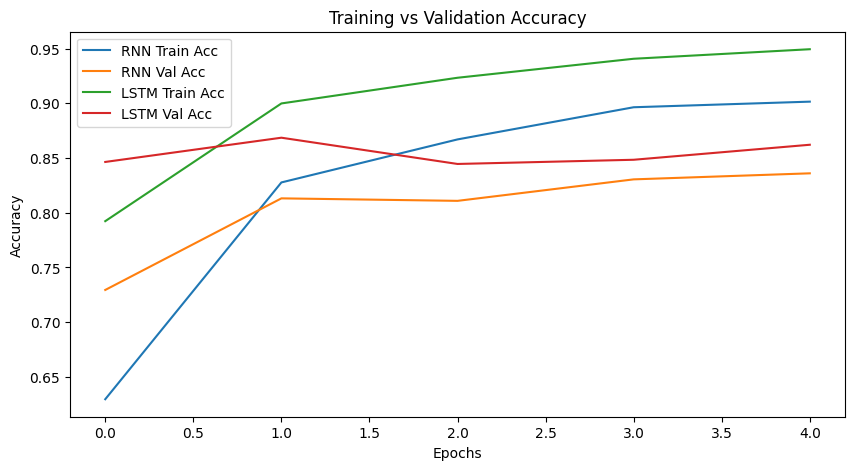

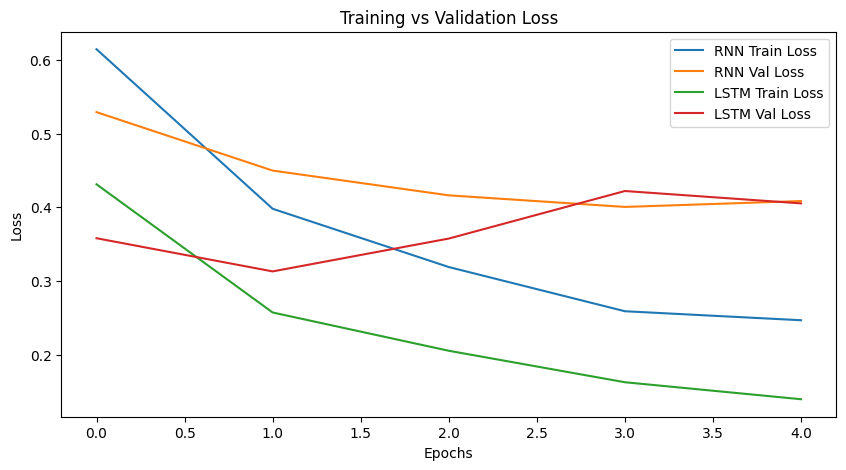

In [5]:
def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=f'{label} Train Acc')
    plt.plot(history.history['val_accuracy'], label=f'{label} Val Acc')

plt.figure(figsize=(10,5))
plot_history(history_rnn, 'RNN')
plot_history(history_lstm, 'LSTM')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
def plot_loss(history, label):
    plt.plot(history.history['loss'], label=f'{label} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{label} Val Loss')

plt.figure(figsize=(10,5))
plot_loss(history_rnn, 'RNN')
plot_loss(history_lstm, 'LSTM')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Accuracy: LSTM (~86%) performed better than RNN (~83%) because it handles long-term dependencies.

Training Time: RNN is much faster (~26s/epoch) compared to LSTM (~60–80s/epoch).

Generalization: Both generalize well, but LSTM achieved higher validation accuracy with slight overfitting.

Sequence Length: Longer sequences hurt RNN more; LSTM manages them better but is slower.